In [1]:
import numpy as np        
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Loading Dataset

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

## Basic EDA

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [24]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [25]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<AxesSubplot:>

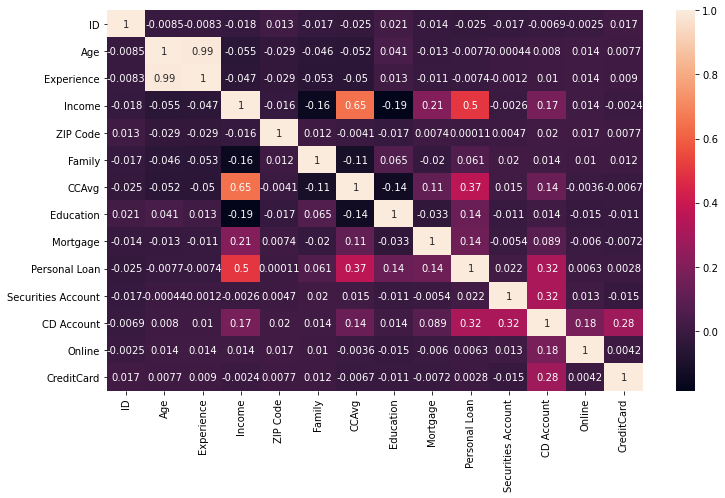

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

In [27]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [28]:
df["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

# Separating Input Features and Output Features

In [29]:
X = df.drop(['Personal Loan', "ID", "ZIP Code"], axis = 1)                                           
y = df['Personal Loan']             

# Splitting the data into Train and Validation Set


In [30]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [31]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [32]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [33]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=41)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of X_train_new: {}'.format(X_train_new.shape))
print('After OverSampling, the shape of y_train_new: {} \n'.format(y_train_new.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_new==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_new==0)))

Before OverSampling, counts of label '1': 323
Before OverSampling, counts of label '0': 3177 

After OverSampling, the shape of X_train_new: (6354, 11)
After OverSampling, the shape of y_train_new: (6354,) 

After OverSampling, counts of label '1': 3177
After OverSampling, counts of label '0': 3177


# Building Model

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    
    return basedModels

In [36]:
def BasedLine2(X_train, y_train,models):
    num_folds = 10
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [37]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR: 0.950286 (0.008685)
LDA: 0.942286 (0.008834)
KNN: 0.906571 (0.010694)
CART: 0.983714 (0.005577)
NB: 0.881714 (0.015237)
SVM: 0.910571 (0.003143)
AB: 0.962286 (0.006975)
GBM: 0.984571 (0.005299)
RF: 0.983143 (0.004857)
ET: 0.979714 (0.005778)


**It looks like RandomForestClassifier is the best model**

### Scaling the data

In [38]:
scaler=StandardScaler()
X_train_new=scaler.fit_transform(X_train_new)
X_test=scaler.transform(X_test)

### Building a RF model

In [52]:
rf=RandomForestClassifier(max_depth=13, n_estimators=600).fit(X_train_new, y_train_new)
y_pred=rf.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, classification_report,precision_recall_curve
print(roc_auc_score(y_test, y_pred))
print("--------------")
print(recall_score(y_test, y_pred))
print("--------------")
print(precision_score(y_test, y_pred))
print("--------------")
print(accuracy_score(y_test, y_pred))
print("--------------")
print(confusion_matrix(y_test, y_pred))
print("--------------")
print(classification_report(y_test, y_pred))

0.9680271850738199
--------------
0.9554140127388535
--------------
0.8522727272727273
--------------
0.978
--------------
[[1317   26]
 [   7  150]]
--------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.85      0.96      0.90       157

    accuracy                           0.98      1500
   macro avg       0.92      0.97      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [63]:
lr=LogisticRegression().fit(X_train_new, y_train_new)

In [64]:
y_predlr=lr.predict(X_test)

In [65]:
print(roc_auc_score(y_test, y_predlr))
print("--------------")
print(recall_score(y_test, y_predlr))
print("--------------")
print(precision_score(y_test, y_predlr))
print("--------------")
print(accuracy_score(y_test, y_predlr))
print("--------------")
print(confusion_matrix(y_test, y_predlr))
print("--------------")
print(classification_report(y_test, y_predlr))

0.8898487557564345
--------------
0.8980891719745223
--------------
0.47
--------------
0.8833333333333333
--------------
[[1184  159]
 [  16  141]]
--------------
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1343
           1       0.47      0.90      0.62       157

    accuracy                           0.88      1500
   macro avg       0.73      0.89      0.77      1500
weighted avg       0.93      0.88      0.90      1500



In [1]:
from pycaret import *

In [9]:
df=df.drop(["ZIP Code", "ID"], axis=1)
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4500, 12)
Unseen Data For Predictions: (500, 12)


In [6]:
from pycaret.classification import *

In [11]:
models = setup(data = data, target = 'Personal Loan', normalize=True,  fix_imbalance=True, numeric_features=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'], session_id=123) 

,Description,Value
0,session_id,123
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4500, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9879,0.9976,0.9180,0.9619,0.9382,0.9315,0.9326,0.1810
rf,Random Forest Classifier,0.9876,0.9972,0.9339,0.9461,0.9380,0.9312,0.9324,0.3490
xgboost,Extreme Gradient Boosting,0.9854,0.9970,0.9180,0.9376,0.9262,0.9181,0.9191,0.4540
gbc,Gradient Boosting Classifier,0.9838,0.9972,0.9370,0.9101,0.9213,0.9123,0.9137,0.3870
et,Extra Trees Classifier,0.9832,0.9934,0.8929,0.9396,0.9142,0.9049,0.9062,0.2800
dt,Decision Tree Classifier,0.9819,0.9561,0.9238,0.9020,0.9113,0.9013,0.9022,0.0290
ada,Ada Boost Classifier,0.9524,0.9825,0.9119,0.7087,0.7955,0.7691,0.7783,0.1650
knn,K Neighbors Classifier,0.9441,0.9535,0.8551,0.6815,0.7558,0.7248,0.7325,0.0740
qda,Quadratic Discriminant Analysis,0.9308,0.9591,0.8454,0.6191,0.7132,0.6752,0.6866,0.0230
lr,Logistic Regression,0.9041,0.9598,0.8678,0.5170,0.6461,0.5950,0.6230,0.7010


In [13]:
lightgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9905,0.9953,0.9032,1.0000,0.9492,0.9439,0.9454
1,0.9937,0.9988,0.9355,1.0000,0.9667,0.9632,0.9638
2,0.9810,0.9975,0.8438,0.9643,0.9000,0.8895,0.8919
3,0.9968,0.9996,1.0000,0.9697,0.9846,0.9828,0.9830
4,0.9810,0.9972,0.8438,0.9643,0.9000,0.8895,0.8919
5,0.9841,0.9956,0.9375,0.9091,0.9231,0.9142,0.9144
6,0.9937,1.0000,1.0000,0.9412,0.9697,0.9662,0.9667
7,0.9810,0.9955,0.8438,0.9643,0.9000,0.8895,0.8919
8,0.9937,0.9981,0.9375,1.0000,0.9677,0.9642,0.9648
9,0.9841,0.9989,0.9355,0.9062,0.9206,0.9118,0.9119


In [14]:
tuned_lightgbm=tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9873,0.9980,0.9032,0.9655,0.9333,0.9263,0.9270
1,0.9937,0.9998,1.0000,0.9394,0.9688,0.9652,0.9658
2,0.9778,0.9939,0.8125,0.9630,0.8814,0.8692,0.8730
3,0.9841,0.9969,0.9375,0.9091,0.9231,0.9142,0.9144
4,0.9810,0.9969,0.8125,1.0000,0.8966,0.8862,0.8920
5,0.9810,0.9956,0.9375,0.8824,0.9091,0.8985,0.8990
6,0.9937,0.9996,1.0000,0.9412,0.9697,0.9662,0.9667
7,0.9873,0.9915,0.9062,0.9667,0.9355,0.9284,0.9290
8,0.9937,0.9991,0.9375,1.0000,0.9677,0.9642,0.9648
9,0.9809,0.9961,0.9355,0.8788,0.9062,0.8956,0.8962


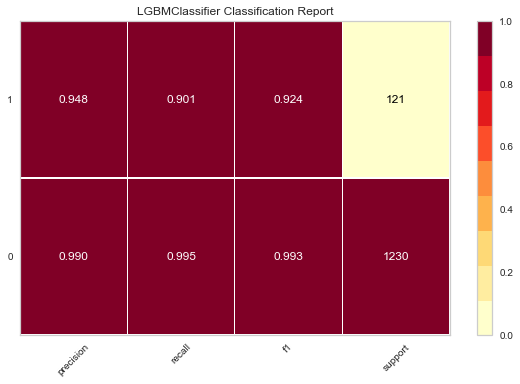

In [15]:
plot_model(tuned_lightgbm, plot = 'class_report')

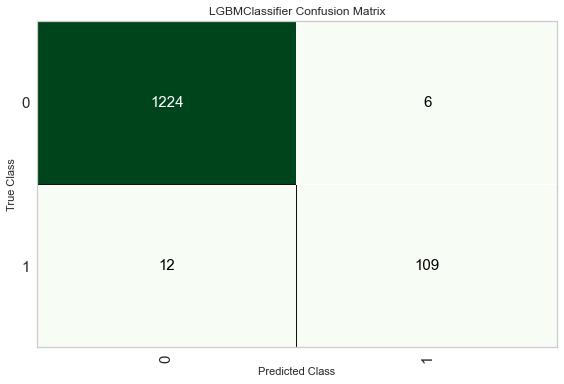

In [16]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [17]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9867,0.9971,0.9008,0.9478,0.9237,0.9164,0.9168


In [19]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [20]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,37,13,29,4,0.4,2,155,0,0,0,1,0,0,0.9995
1,50,24,22,1,0.3,3,0,0,0,0,0,1,0,0.9997
2,29,5,45,3,0.1,2,0,0,0,0,1,0,0,0.9993
3,59,32,40,4,2.5,2,0,0,0,0,1,0,0,0.9990
4,46,21,193,2,8.1,3,0,1,0,0,0,0,1,0.9933


In [23]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Personal Loan'], unseen_predictions['Label'], metric = 'Accuracy')

0.996

In [24]:
check_metric(unseen_predictions['Personal Loan'], unseen_predictions['Label'], metric = 'Recall')

0.9524